## Importação Bibliotecas

In [1]:
import pandas as pd
import matplotlib
import plotly.express as px
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

## Dados 
O dataset foi gerado no site [paineldeprecos](https://paineldeprecos.planejamento.gov.br/analise-materiais) 

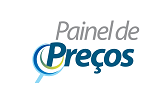





O painel de compras é uma ferramenta desenvolvida pelo Ministério do
Planejamento que disponibiliza, de forma clara e de
fácil leitura, dados e informações de compras públicas
homologadas.
<br>Há vários filtros para a geração dos dados, é necessario escolher no minimo três filtros.
<br>Dados coletados:
* Compras realizadas em 2021
* Esfera Federal
* Materiais:
  *   Caneta Esferográfica
  *   Caderno
  *   Papel Higiênico
  *   Vassoura
  *   Água mineral Natural
  *   Álcool Isopropílico
  *   Sildenafila

In [6]:
df_painel_1 = pd.read_excel('dados/dados_precos.xlsx')
df_painel_2 = pd.read_excel('dados/precos.xlsx')

In [7]:
df_painel = pd.concat([df_painel_1,df_painel_2])
df_painel.reset_index(drop=True, inplace=True)

## **Tratamento dos dados**

Modificando todos os nomes das colunas

In [ ]:
df_painel.rename(columns={'Identificação da Compra': 'Id_compra', 'Número do Item': 'Nr_item', 'Modalidade': 'modalidade', 
                              'Código do CATMAT': 'cod_CATMAT', 'Descrição do Item': 'desc_item', 'Unidade de Fornecimento': 'Un_fornecimento',
                              'Quantidade ofertada': 'Qtd_ofertada','Valor unitário': 'vlr_unitario', 'Fornecedor': 'fornecedor','Órgão':'orgao',
                               'UASG - Unidade Gestora': 'Un_gestora', 'Data da Compra': 'data_compra', }, inplace = True)

Removendo coluna desnecessário 

In [ ]:
df_painel.drop('Unnamed: 0',inplace=True,axis=1)

Modificando o tipo da coluna para inteiro

In [ ]:
df_painel['Qtd_ofertada'] = df_painel.Qtd_ofertada.replace(to_replace='[.]', value ='',regex=True)
df_painel.Qtd_ofertada = df_painel.Qtd_ofertada.astype(int)

In [ ]:
df_painel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id_compra        2781 non-null   object        
 1   Nr_item          2781 non-null   int64         
 2   modalidade       2781 non-null   object        
 3   cod_CATMAT       2781 non-null   int64         
 4   Un_fornecimento  2781 non-null   object        
 5   Qtd_ofertada     2781 non-null   int64         
 6   vlr_unitario     2781 non-null   float64       
 7   fornecedor       2781 non-null   object        
 8   orgao            2781 non-null   object        
 9   Un_gestora       2781 non-null   object        
 10  data_compra      2781 non-null   datetime64[ns]
 11  desc_item        2781 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 260.8+ KB


In [ ]:
df_painel.describe()

,Nr_item,cod_CATMAT,Qtd_ofertada,vlr_unitario
count,2781.000000,2781.000000,2.781000e+03,2781.000000
mean,43.654800,322078.305286,5.651806e+03,17.339979
std,61.964305,117625.006919,5.665763e+04,131.771371
min,1.000000,32859.000000,1.000000e+00,0.010000
25%,6.000000,234645.000000,8.000000e+01,0.920000
50%,19.000000,318938.000000,4.600000e+02,5.300000
75%,54.000000,443004.000000,1.830000e+03,13.550000
max,476.000000,481234.000000,1.994100e+06,6089.950000


In [ ]:
df_painel.head()

,Id_compra,Nr_item,modalidade,cod_CATMAT,Un_fornecimento,Qtd_ofertada,vlr_unitario,fornecedor,orgao,Un_gestora,data_compra,desc_item
0,00160/2021,1,Dispensa de Licitação,151014,UNIDADE,1,6089.95,N & N COMERCIO DE PRODUTOS LTDA,COMANDO DA MARINHA,786810 - CENTRO DE INTENDENCIA DA MARINHA EM L...,2021-10-20,VASSOURA
1,00030/2021,7,Dispensa de Licitação,443004,"FARDO 64,00 UN",10,168.00,"WA - ARTIGOS DE PAPELARIA, COMERCIO E SERVICOS...","MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",130081 - 10 DISTRITO DE METEOROLOGIA DE GOIANIA,2021-12-31,PAPEL HIGIÊNICO
2,00013/2021,38,Pregão,392369,SACHÊ,5,163.60,MERCOSCIENCE COMERCIAL LTDA,EMPRESA BRASILEIRA DE PESQUISA AGROPECUARIA,135026 - EMBRAPA INSTRUMENTAÇÃO/SÃO CARLOS/SP,2021-12-17,ÁLCOOL ISOPROPÍLICO
3,00011/2021,16,Pregão,407762,EMBALAGEM 1 L,1,151.00,MERCK S/A,EMPRESA BRASILEIRA DE PESQUISA AGROPECUARIA,135032 - EMBRAPA TRIGO/PASSO FUNDO/RS,2021-12-14,ÁLCOOL ISOPROPÍLICO
4,00147/2021,11,Dispensa de Licitação,481234,UNIDADE,2,150.00,VILA PISCINAS COM. DE EQUIPAMENTOS EIRELI,COMANDO DO EXERCITO,160093 - 38 BATALHAO DE INFANTARIA/MEX/ES,2021-12-17,VASSOURA


Removendo linhas duplicadas

In [ ]:
print('Tamanho: ',len(df_painel))
df_painel = df_painel.drop_duplicates()
print('Tamanho após remover duplicados: ',len(df_painel))

Tamanho:  2781
Tamanho após remover duplicados:  2681


In [ ]:
df_painel['total'] = df_painel['Qtd_ofertada'] * df_painel['vlr_unitario']

## **Top 5 Órgãos com mais processos de compras**

In [ ]:
df_top = df_painel.orgao.value_counts()[:5].to_frame()

In [ ]:
df_top

,orgao
COMANDO DO EXERCITO,882
COMANDO DA MARINHA,310
COMANDO DA AERONAUTICA,217
EMPRESA BRASILEIRA DE SERVIÇOS HOSPITALARES,110
FUNDACAO NACIONAL DO INDIO,69


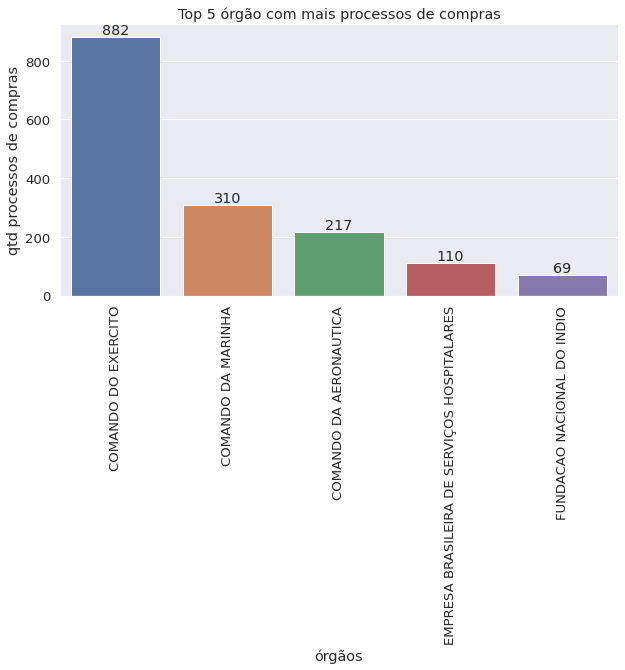

In [ ]:
figure, ax = plt.subplots(figsize=(10, 5))
ax=sns.barplot(data=df_top, x=df_top.index, y='orgao')
ax.bar_label(ax.containers[0])
plt.xticks(rotation='vertical')
plt.title("Top 5 órgão com mais processos de compras")
plt.xlabel("órgãos")
plt.ylabel("qtd processos de compras")
plt.show()

## Quantidade de Itens compradas para os 2 Top órgãos

In [ ]:
df_ex = df_painel[df_painel.orgao == "COMANDO DO EXERCITO" ]

In [ ]:
df_ex_bar = df_ex.pivot_table(index='desc_item', values='Qtd_ofertada', aggfunc='sum').reset_index()

In [ ]:
df_ex_bar

,desc_item,Qtd_ofertada
0,CADERNO,409276
1,CANETA ESFEROGRÁFICA,318004
2,PAPEL HIGIÊNICO,585513
3,VASSOURA,206605
4,ÁGUA MINERAL NATURAL,1193744
5,ÁLCOOL ISOPROPÍLICO,544947


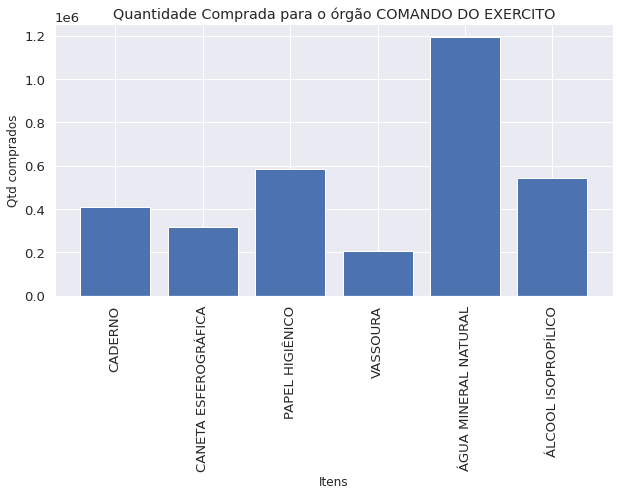

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar('desc_item','Qtd_ofertada',data=df_ex_bar)
plt.title('Quantidade Comprada para o órgão COMANDO DO EXERCITO')
plt.xlabel('Itens',fontsize=12)
plt.ylabel('Qtd comprados',fontsize=12)
plt.show()

In [ ]:
df_ma = df_painel[df_painel.orgao == "COMANDO DA MARINHA" ]
df_ma_bar = df_ma.pivot_table(index='desc_item', values='Qtd_ofertada', aggfunc='sum').reset_index()

In [ ]:
df_ma_bar.sort_values(by='Qtd_ofertada')

,desc_item,Qtd_ofertada
0,CADERNO,5810
3,SILDENAFILA,13200
6,ÁLCOOL ISOPROPÍLICO,45019
4,VASSOURA,84730
1,CANETA ESFEROGRÁFICA,87144
5,ÁGUA MINERAL NATURAL,99000
2,PAPEL HIGIÊNICO,610892


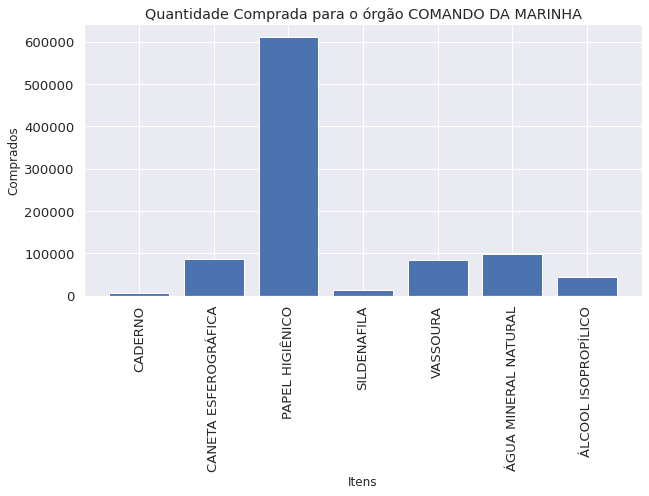

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar('desc_item','Qtd_ofertada',data=df_ma_bar)
plt.title('Quantidade Comprada para o órgão COMANDO DA MARINHA')
plt.xlabel('Itens',fontsize=12)
plt.ylabel('Comprados',fontsize=12)
plt.show()

## **Modalidade em que a compra foi realizada**

In [ ]:
df_modalidade = df_painel.modalidade.value_counts().to_frame()

In [ ]:
df_modalidade

,modalidade
Pregão,2049
Dispensa de Licitação,631
Inexigibilidade de Licitação,1


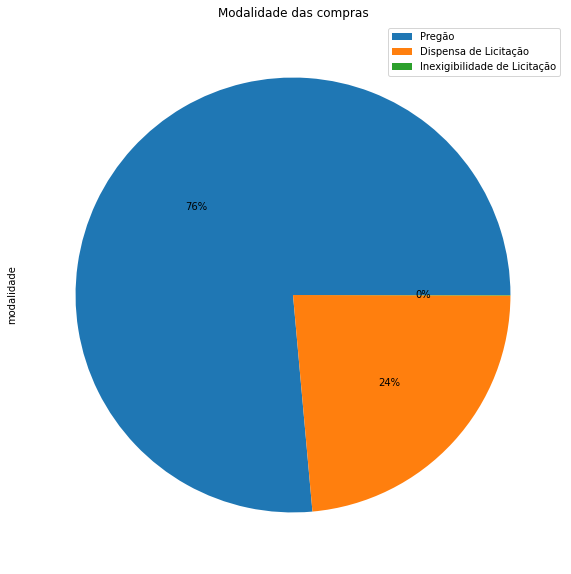

In [ ]:
df_modalidade.plot(y='modalidade', kind='pie', autopct='%1.0f%%', labeldistance=None, figsize=(15,10),title='Modalidade das compras');

## **Quantidade de processos de Compra por material**

In [ ]:
x1 = df_painel.groupby('desc_item')['Id_compra'].nunique().to_frame()
x1 = x1.sort_values(by= 'Id_compra',ascending=False)


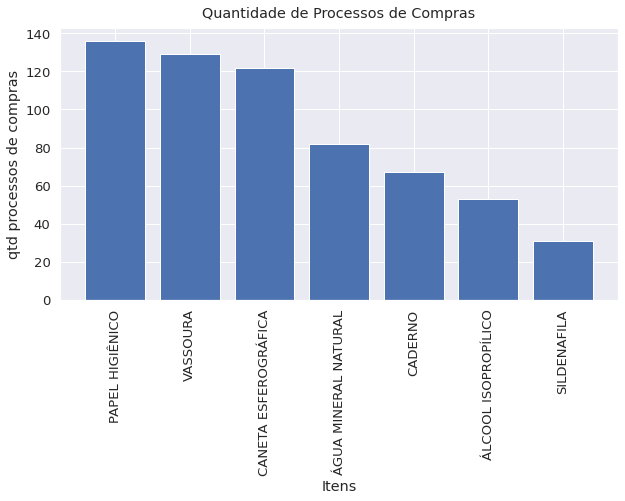

In [ ]:
figure, ax = plt.subplots(figsize=(10, 5))
plt.xticks(rotation='vertical')
plt.bar(x1.index, x1['Id_compra'])
plt.title('Quantidade de Processos de Compras',pad=10)
plt.xlabel("Itens")
plt.ylabel("qtd processos de compras")
plt.show()

## **Quantidade de Fornecedores por Material**

In [ ]:
x = df_painel.groupby('desc_item')['fornecedor'].nunique()

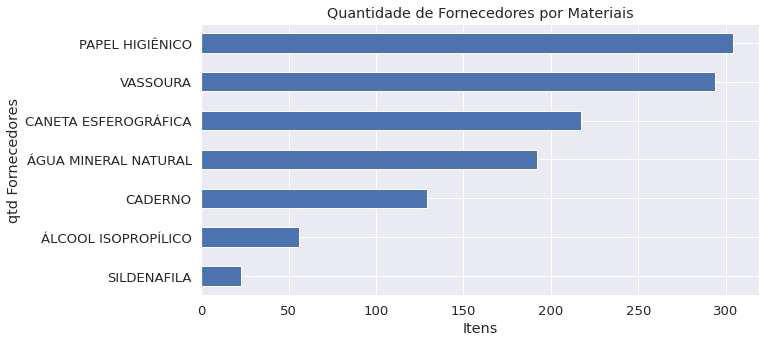

In [ ]:
x.sort_values(ascending=True).plot(kind='barh',figsize = (10, 5),title='Quantidade de Fornecedores por Materiais')
plt.xlabel("Itens")
plt.ylabel("qtd Fornecedores")
plt.show()

## **Média/Mediana de preços por período**

### Média

In [ ]:
df_mean=df_painel.pivot_table(index='data_compra', columns='desc_item', values='vlr_unitario', aggfunc='mean')
df_mean

desc_item,CADERNO,CANETA ESFEROGRÁFICA,PAPEL HIGIÊNICO,SILDENAFILA,VASSOURA,ÁGUA MINERAL NATURAL,ÁLCOOL ISOPROPÍLICO
data_compra,,,,,,,
2021-01-06,NaN,NaN,48.630000,NaN,6.995000,NaN,NaN
2021-01-07,NaN,NaN,16.700000,NaN,8.101250,NaN,5.31
2021-01-09,NaN,NaN,31.661667,1.35,21.014000,NaN,NaN
2021-01-10,NaN,NaN,2.445000,NaN,8.588000,NaN,NaN
2021-01-12,NaN,NaN,3.900000,NaN,14.130000,NaN,51.81
...,...,...,...,...,...,...,...
2021-12-27,9.400,1.150000,18.437500,NaN,16.933333,0.710000,NaN
2021-12-28,5.650,0.979975,NaN,NaN,NaN,16.300000,63.90
2021-12-29,8.665,1.270000,42.400000,NaN,4.926667,0.826667,NaN


In [ ]:
fig=px.line(df_mean, facet_row='desc_item', markers=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(title="Média de preços por periodo")
fig.update_layout(legend_title="Itens")
fig.update_layout(xaxis_title='Data da Compra')
fig.update_layout(annotations=[], overwrite=True)

### Mediada

In [ ]:
df_median=df_painel.pivot_table(index='data_compra', columns='desc_item', values='vlr_unitario', aggfunc='median')
df_median

desc_item,CADERNO,CANETA ESFEROGRÁFICA,PAPEL HIGIÊNICO,SILDENAFILA,VASSOURA,ÁGUA MINERAL NATURAL,ÁLCOOL ISOPROPÍLICO
data_compra,,,,,,,
2021-01-06,NaN,NaN,64.800,NaN,6.995,NaN,NaN
2021-01-07,NaN,NaN,3.835,NaN,7.695,NaN,5.31
2021-01-09,NaN,NaN,26.950,1.35,13.450,NaN,NaN
2021-01-10,NaN,NaN,2.445,NaN,8.000,NaN,NaN
2021-01-12,NaN,NaN,3.900,NaN,9.800,NaN,51.81
...,...,...,...,...,...,...,...
2021-12-27,9.400,1.15000,6.610,NaN,17.900,0.71,NaN
2021-12-28,5.650,1.09495,NaN,NaN,NaN,16.30,63.90
2021-12-29,8.665,0.72000,42.400,NaN,4.220,0.85,NaN


In [ ]:
fig=px.line(df_median, facet_row='desc_item', markers=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(title="Média de preços")
fig.update_layout(legend_title="Itens")
fig.update_layout(xaxis_title='Data da Compra')
fig.update_layout(annotations=[], overwrite=True)

## **Valor de compra por material**

In [ ]:
df_bar = df_painel.pivot_table(index='desc_item', values='total', aggfunc='sum').reset_index()

In [ ]:
df_bar

,desc_item,total
0,CADERNO,2.750611e+06
1,CANETA ESFEROGRÁFICA,1.495440e+06
2,PAPEL HIGIÊNICO,1.969987e+07
3,SILDENAFILA,7.361566e+05
4,VASSOURA,3.689875e+06
5,ÁGUA MINERAL NATURAL,2.650071e+06
6,ÁLCOOL ISOPROPÍLICO,1.496413e+06


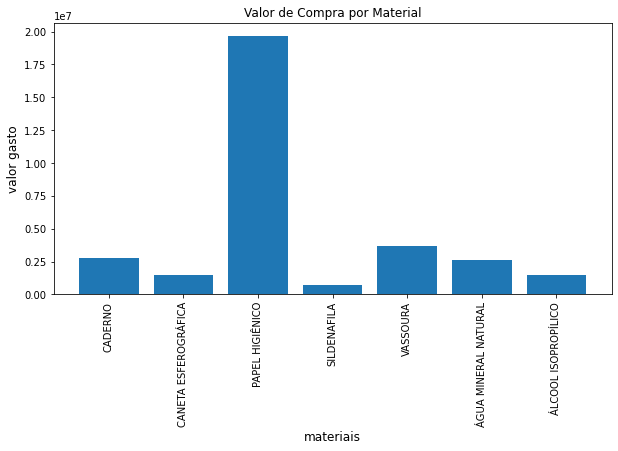

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar('desc_item','total',data=df_bar)
plt.title('Valor de Compra por Material')
plt.xlabel('materiais',fontsize=12)
plt.ylabel('valor gasto',fontsize=12)
plt.show()

In [ ]:
df_bar = df_painel.pivot_table(index='desc_item', values='total', aggfunc='sum').reset_index()
x2 = df_bar.loc[(df_bar['desc_item'] != 'VASSOURA') & (df_bar['desc_item'] != 'PAPEL HIGIÊNICO')]
x2

,desc_item,total
0,CADERNO,2.750611e+06
1,CANETA ESFEROGRÁFICA,1.495440e+06
3,SILDENAFILA,7.361566e+05
5,ÁGUA MINERAL NATURAL,2.650071e+06
6,ÁLCOOL ISOPROPÍLICO,1.496413e+06


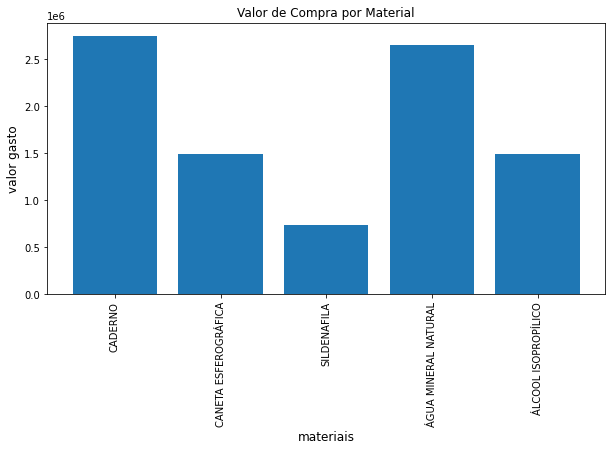

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar('desc_item','total',data=x2)
plt.title('Valor de Compra por Material')
plt.xlabel('materiais',fontsize=12)
plt.ylabel('valor gasto',fontsize=12)
plt.show()

## **Dispersão por Item de Compra**

Quantidade X Preço Total

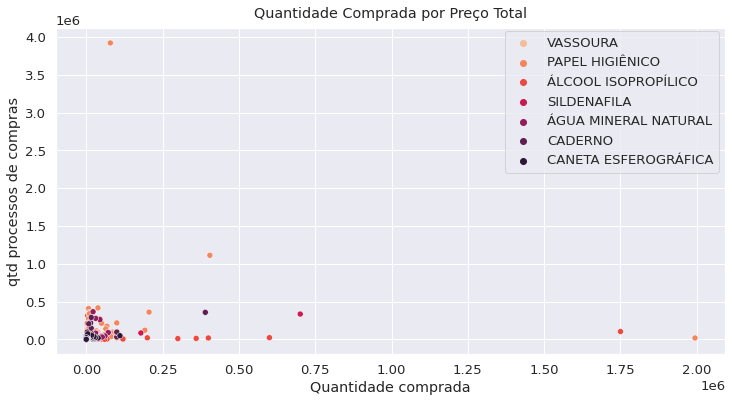

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_painel, x='Qtd_ofertada', y='total', hue='desc_item', palette='rocket_r')
plt.title('Quantidade Comprada por Preço Total',pad=10)
plt.xlabel("Quantidade comprada")
plt.ylabel("qtd processos de compras")

plt.legend(bbox_to_anchor=(1,1.01));

Quantidade X Preço unitário

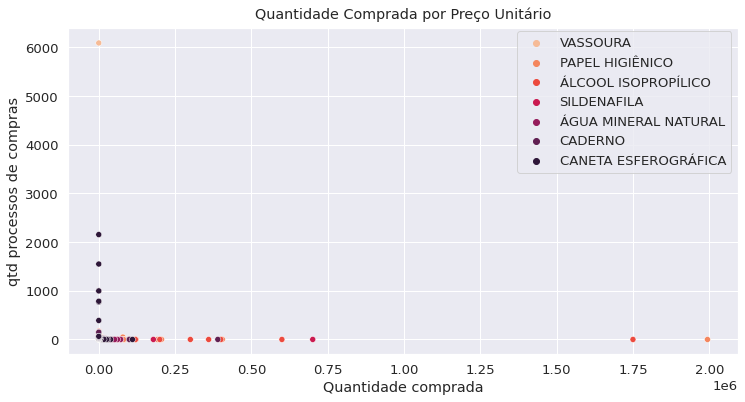

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_painel, x='Qtd_ofertada', y='vlr_unitario', hue='desc_item', palette='rocket_r')
plt.title('Quantidade Comprada por Preço Unitário',pad=10)
plt.xlabel("Quantidade comprada")
plt.ylabel("qtd processos de compras")
plt.legend(bbox_to_anchor=(1,1.01));

## **Compras dos Itens por período**

In [ ]:
df_compras = df_painel.pivot_table(index='data_compra', columns='desc_item', values='total', aggfunc='sum')
fig=px.line(df_compras, title='Compras no ano 2021 por Itens')

fig.update_layout(xaxis_title=None,
    yaxis_title="Valor total comprado",
    legend_title="Itens",
    title={
        'y':0.85,
        'x':0.27,
        'font_family': 'Times New Roman',
        'font_color': 'black'
    })


## **Distribuição do valor unitário por Itens**

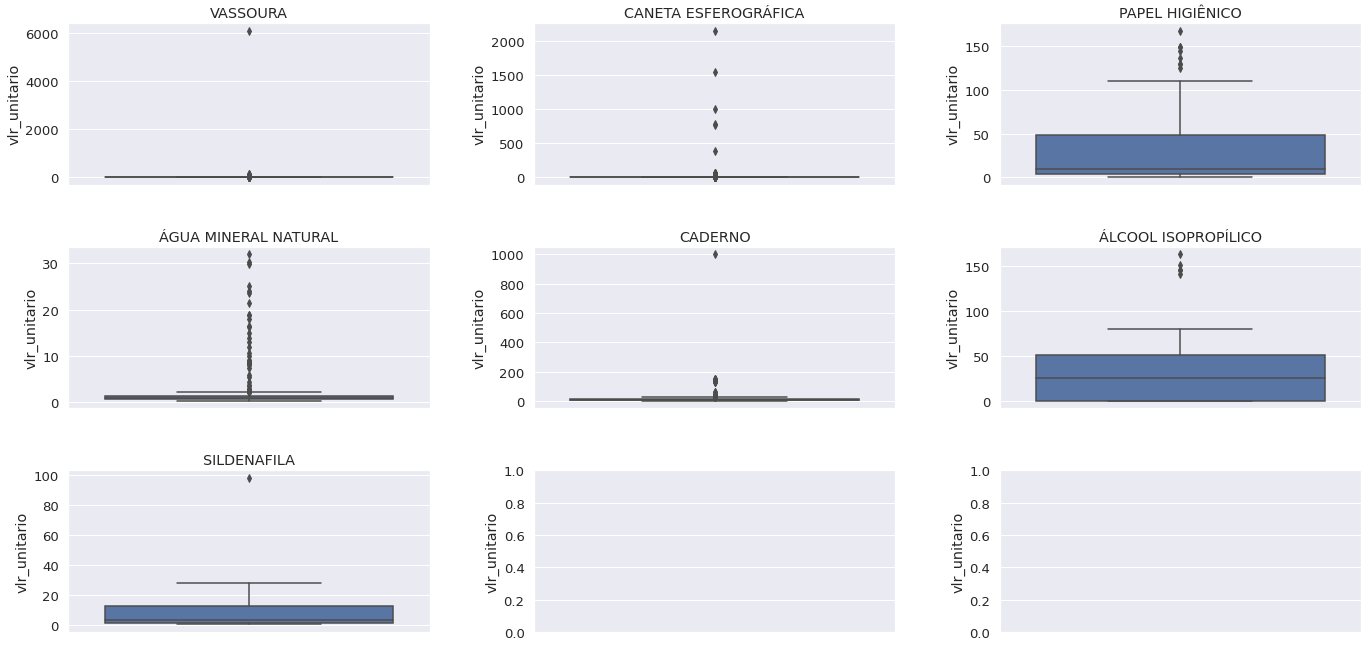

In [ ]:
materiais = [['VASSOURA','CANETA ESFEROGRÁFICA','PAPEL HIGIÊNICO',],
                    ['ÁGUA MINERAL NATURAL','CADERNO','ÁLCOOL ISOPROPÍLICO'],
                    ['SILDENAFILA','','']]
                     
plt.title('Valor unitário por Itens',pad=10)
sns.set(font_scale=1.2)
fig, eixo = plt.subplots(3,3,figsize=(20,10))

for linha in range(3):
    for coluna in range(3):
      df_material = df_painel[df_painel.desc_item == materiais[linha][coluna] ]
      ax = sns.boxplot(data=df_material,y='vlr_unitario',ax=eixo[linha][coluna])
      ax.set_title(materiais[linha][coluna])

fig.tight_layout(pad=3)

## **Variação dos preços para Itens do mesmo Fornecedor por período**

In [ ]:
grouped = df_painel.groupby(['fornecedor','desc_item'])

In [ ]:
filtro = grouped.filter(lambda x: len(x) >= 20)

In [ ]:
df_novo = pd.DataFrame()
df_novo['fornecedor'] = filtro.fornecedor
df_novo['desc_item'] = filtro.desc_item
df_novo['vlr_unitario'] = filtro.vlr_unitario
df_novo['Qtd_ofertada'] = filtro.Qtd_ofertada
df_novo['data_compra'] = filtro.data_compra

In [ ]:
grouped_2 = df_novo.groupby(['fornecedor','desc_item'])

In [ ]:
for name, group in grouped_2:
  print(name)
  print(len(group))

('MULTISUL COMERCIO E DISTRIBUICAO LTDA', 'VASSOURA')
21
('RAFA PAPER DISTRIBUIDORA EIRELI', 'CANETA ESFEROGRÁFICA')
25
('RC RAMOS COMERCIO LTDA', 'CANETA ESFEROGRÁFICA')
80


Pegando os Fornecedores com mais dados por itens

In [ ]:
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
for name, group in grouped_2:
  if name == ('RC RAMOS COMERCIO LTDA', 'CANETA ESFEROGRÁFICA'):
    df_1 = group
  if name ==  ('MULTISUL COMERCIO E DISTRIBUICAO LTDA', 'VASSOURA'):
    df_2 = group

Boxplot: RC RAMOS COMERCIO LTDA', 'CANETA ESFEROGRÁFICA

In [ ]:
df_1

,fornecedor,desc_item,vlr_unitario,Qtd_ofertada,data_compra
2153,RC RAMOS COMERCIO LTDA,CANETA ESFEROGRÁFICA,0.3874,2000,2021-07-19
2172,RC RAMOS COMERCIO LTDA,CANETA ESFEROGRÁFICA,0.4000,1500,2021-11-19
2193,RC RAMOS COMERCIO LTDA,CANETA ESFEROGRÁFICA,0.4200,9300,2021-07-28
2194,RC RAMOS COMERCIO LTDA,CANETA ESFEROGRÁFICA,0.4200,4350,2021-10-04
2196,RC RAMOS COMERCIO LTDA,CANETA ESFEROGRÁFICA,0.4200,7230,2021-10-04
...,...,...,...,...,...
2741,RC RAMOS COMERCIO LTDA,CANETA ESFEROGRÁFICA,16.8800,83,2021-08-23
2745,RC RAMOS COMERCIO LTDA,CANETA ESFEROGRÁFICA,18.4600,32,2021-08-23
2752,RC RAMOS COMERCIO LTDA,CANETA ESFEROGRÁFICA,23.4000,50,2021-10-05
2759,RC RAMOS COMERCIO LTDA,CANETA ESFEROGRÁFICA,25.9900,200,2021-10-05


Text(0, 0.5, 'Valor unitário')

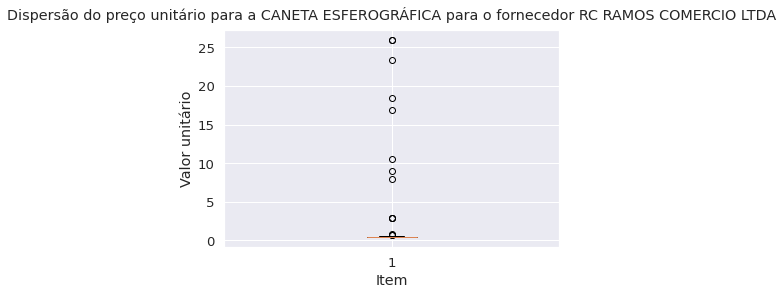

In [ ]:
plt.boxplot(df_1['vlr_unitario'])
plt.title('Dispersão do preço unitário para a CANETA ESFEROGRÁFICA para o fornecedor RC RAMOS COMERCIO LTDA',pad=10)
plt.xlabel("Item")
plt.ylabel("Valor unitário")

Boxplot: MULTISUL COMERCIO E DISTRIBUICAO LTDA X	VASSOURA

Text(0, 0.5, 'Valor unitário')

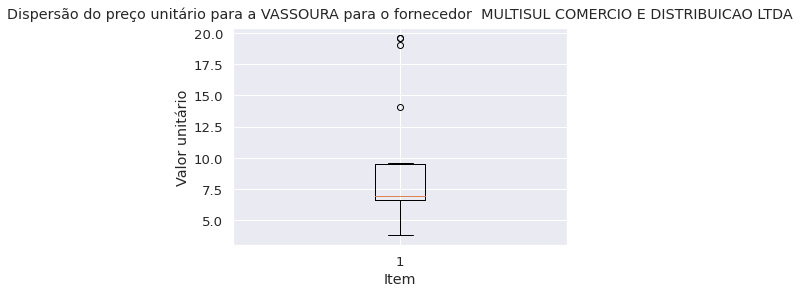

In [ ]:
plt.boxplot(df_2['vlr_unitario'])
plt.title('Dispersão do preço unitário para a VASSOURA para o fornecedor  MULTISUL COMERCIO E DISTRIBUICAO LTDA',pad=10)
plt.xlabel("Item")
plt.ylabel("Valor unitário")

Grafico de linha por periodo

RC RAMOS COMERCIO LTDA', 'CANETA ESFEROGRÁFICA

In [ ]:
df_total=df_1.pivot_table(index='data_compra', values='vlr_unitario', aggfunc='sum')
fig=px.line(x=df_total.index, y=df_total['vlr_unitario'])
fig.update_layout(
    xaxis_title={
        'text':'Data',
    },
    yaxis_title={
        'text': 'Valor',
    },
    font_color='grey',
    title={
        'x': 0.5,
        'y': 0.93,
    },
    template='ggplot2'
)

MULTISUL COMERCIO E DISTRIBUICAO LTDA X	VASSOURA

In [ ]:
df_total=df_2.pivot_table(index='data_compra', values='vlr_unitario', aggfunc='sum')
fig=px.line(x=df_total.index, y=df_total['vlr_unitario'])
fig.update_layout(
    xaxis_title={
        'text':'Data',
    },
    yaxis_title={
        'text': 'Valor',
    },
    font_color='grey',
    title={
        'x': 0.5,
        'y': 0.93,
    },
    template='ggplot2'
)